In [255]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size']=16

In [256]:
# model parameters:
g= 9.8     #[m/s^2]
v_t = 20.0 #[m/s] trim velocity
C_D = 1/40 #drag coef.
C_L = 1    #coefficient of lift

#ICs
v0 = v_t
theta0 = 0
x0 = 0
y0 = 1000

In [257]:
def f(u):
    """ Returns RHS of phugoid system of eqns.
    parameters: 
        u - array of float with solution at time n
        
    returns:
        dudt - array of float with solution of RHS given u    
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                       -g*cos(theta)/v +g/v_t**2*v,
                       v*cos(theta),
                       v*sin(theta)])

In [258]:
def euler(u,f,dt):
    """Euler's method, returns next time step
    
    u: soln. at previous time step
    f: function to compute RHS of system of equations
    dt: dt.
    
    """
    return u + dt*f(u)

In [259]:
T = 100 #t_final
dt = 0.1
N = int(T/dt) + 1
t = numpy.linspace(0,T,N)
#initialize array
u = numpy.empty((N,4))
u[0] = numpy.array([v0, theta0, x0, y0]) #ICs

#Euler's method
for n in range(N-1):
    u[n+1] = euler(u[n], f, dt)

In [260]:
x = u[:,2]
y = u[:,3]

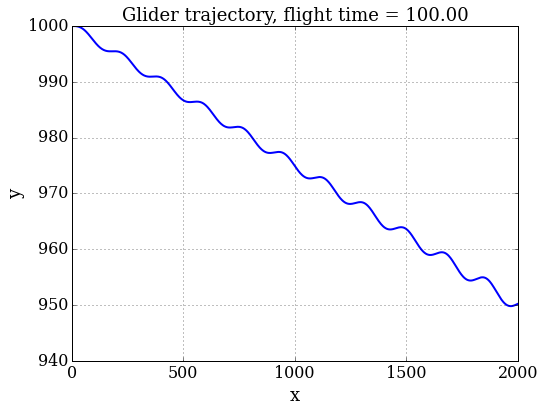

In [261]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' %T, fontsize=18)
pyplot.plot(x,y, lw=2);

In [262]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
for i, dt in enumerate(dt_values):
    N=int(T/dt) + 1
    t = numpy.linspace(0.0, T, N)
    
    #initialize solution array
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    for n in range(N-1):
        u[n+1] = euler(u[n], f, dt)
        
    u_values[i] = u

In [263]:
def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the finest grid using the L1 norm
    parameters: 
        u_current: solution on current grid
        u_finest:  solution on fine grid
        dt
        
    returns:
        diffgrid: difference computed in L1 norm
    """
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    
    grid_size_ratio = ceil(N_fine/N_current)
    diffgrid = dt*numpy.sum(numpy.abs(u_current[:,2]-u_fine[::grid_size_ratio,2]))
    
    return diffgrid

In [264]:
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))
    
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


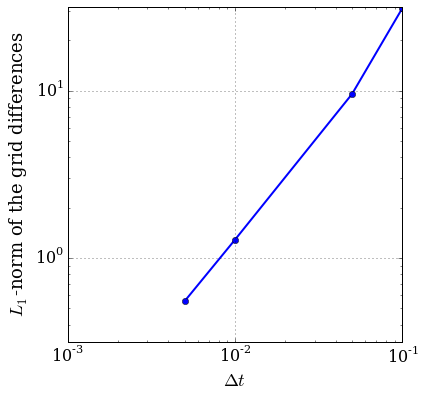

In [265]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], ls='-', marker='o', lw=2);

In [266]:


r = 2  #what is r?
h = 0.001

dt_values2 = numpy.array([h, r*h, r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   # number of time-steps
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    for n in range(N-1):

        u[n+1] = euler(u[n], f, dt)         
    
    # store the value of u related to one grid
    u_values2[i] = u
    

#calculate f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calculate f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

# calculate the order of convergence
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));

The order of convergence is p = 1.029


Paper Airplane Challenge: 
  - Find a combination of launch angle and velocity that gives best distance.
    

In [267]:
L_D = 5.0
C_D = 1/L_D
v_t = 4.9 #[m/s]
#ICs
theta0 = 0
x0 = 0
y0 = 2 #[m] - a realistic height to throw a paper airplane from
v0 = v_t
#height = y0
#t = [0]

dt = 0.001
T=20
N = int(T/dt)+1
t = numpy.linspace(0,T, N)

def challenge(arg1, arg2):
    u = numpy.empty((N,4))
    u[0] = numpy.array([arg1, arg2, x0, y0])
    #print(numpy.shape(u))
    #print(N)
    for n in range(N-1):
        u[n+1] = euler(u[n], f, dt)
        n_max = n
        if u[n][3] <= 0:
            break
    #print(numpy.shape(u))
    u = u[:n_max]
    #print(numpy.shape(u))

    return u



In [268]:
u = challenge(5, 0)
print(u[-1][2])

10.4577277488


In [269]:
#iterate over v0, theta0, taking large steps
#find a best solution
max_dist = 0.0
max_params = [0, 0]
for theta0 in range (-90, 90, 5):
    for v0 in range (1, 10):
        u = numpy.empty((1,4))
        u_final = challenge(v0, theta0)
        if u_final[-1][2] > max_dist:
            max_params_low_res = [v0, theta0]
            max_dist_low_res = u_final[-1][2]
            best_run_low_res = u_final

print(max_dist_low_res)
print(max_params_low_res)

0.635345072227
[9, 80]


In [270]:
#iterate at a finer resolution over previous solution
max_dist = 0.0 #
max_params = [0, 0]
for theta0 in range (max_params_low_res[1] -5, max_params_low_res[1] +5):
    for v0 in range (max_params_low_res[0] -5, max_params_low_res[0] + 5):
        u = numpy.empty((1,4))
        u_final = challenge(v0, theta0)
        if u_final[-1][2] > max_dist:
            max_params= [v0, theta0]
            max_dist = u_final[-1][2]
            best_run = u_final

print(max_dist)
print(max_params)

17.9958296006
[10, 75]


max distance: 18.00 m, v0= 10.00, theta0 = 75.00


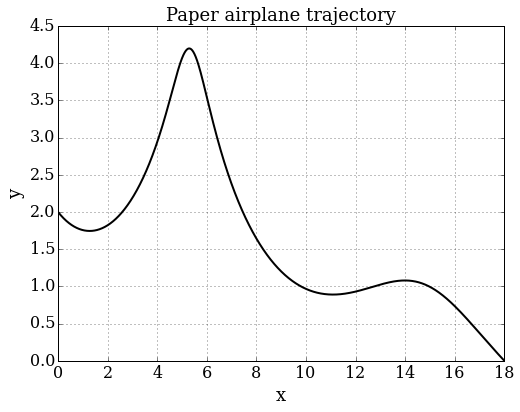

In [271]:
#print(u_longest)
x = best_run[:,2]
y = best_run[:,3]
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Paper airplane trajectory', fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

print("max distance: {:.2f} m, v0= {:.2f}, theta0 = {:.2f}".format(max_dist, max_params[0], max_params[1]))